### Distribution

밀도 플롯은 수치 변수의 분포를 보여줍니다. 숫자 값 집합 만 입력으로 사용합니다. 정말 히스토그램에 가깝습니다. 

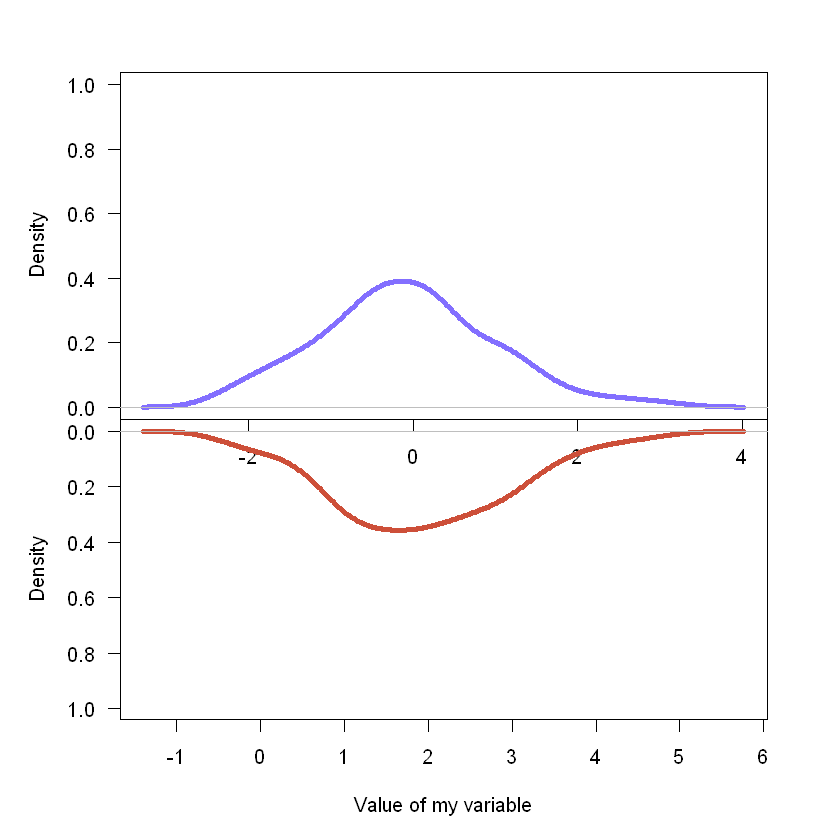

In [4]:
#Create Data
x1 = rnorm(100)
x2 = rnorm(100, mean=2)
par(mfrow=c(2,1))
 
#Make the plot
# mar : 여백크기 설정 - 아래쪽, 왼쪽, 위쪽 및 오른쪽 순서
# xaxt="n" 넣기 
par(mar=c(0,5,3,3))   
plot(density(x1) , main="" , 
             xlab="", ylim=c(0,1) , 
             las=1 ,                       
             col="slateblue1" , 
             lwd=4 )

par(mar=c(5,5,0,3))
plot(density(x2) , main="" , 
             xlab="Value of my variable", 
             ylim=c(1,0) , 
             las=1 , 
             col="tomato3" , 
             lwd=4)

## 히스토 그램(Hist)


 * 히스토그램은 숫자 데이터 분포의 정확한 그래픽 표현입니다. 하나의 숫자 변수 만 입력으로 사용합니다.
 * 관측 수는 막대의 높이로 표시됩니다
 * 여러 분포를 비교하기 위해 같은 축을 추가하거나, violinplots를 추가.
 * ref : https://www.r-graph-gallery.com/histogram/

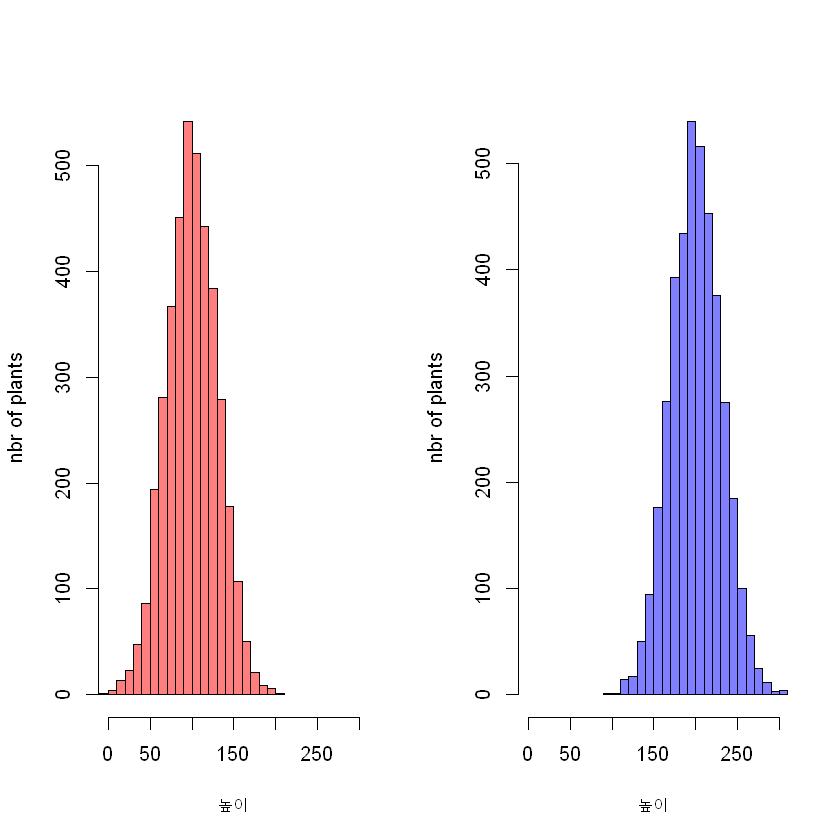

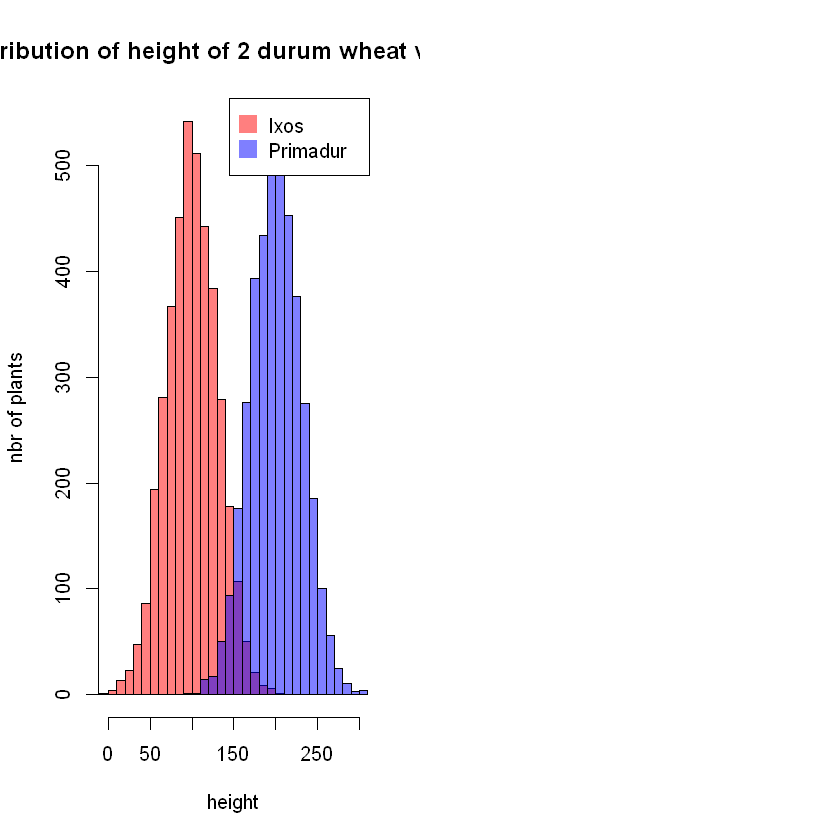

In [8]:
# 데이터 만들기
Ixos=rnorm(4000 , 100 , 30)     
Primadur=rnorm(4000 , 200 , 30) 
 
# 각각 그래프 표현 
par(mfrow=c(1,2))
hist(Ixos, breaks=30 , 
     xlim=c(0,300) , 
     col=rgb(1,0,0,0.5) , 
     xlab="높이" , ylab="nbr of plants" , main="" )
hist(Primadur, breaks=30 , 
     xlim=c(0,300) , 
     col=rgb(0,0,1,0.5) , 
     xlab="높이" , ylab="nbr of plants" , main="")


# 분포의 차이를 보는 것은 어렵다. 
# 이 경우, 그래프를 같은 그래프 위로 두는 것이 흥미로울 것이다.
# 전체 그래프를 보기 위한 투명도
hist(Ixos, breaks=30, xlim=c(0,300), col=rgb(1,0,0,0.5), xlab="높이", 
     ylab="nbr of plants", main="distribution of height of 2 durum wheat varieties" )

hist(Primadur, breaks=30, xlim=c(0,300), col=rgb(0,0,1,0.5), add=T)

legend("topright", 
       legend=c("Ixos","Primadur"), 
       col=c(rgb(1,0,0,0.5), 
       rgb(0,0,1,0.5)), pt.cex=2, pch=15 )

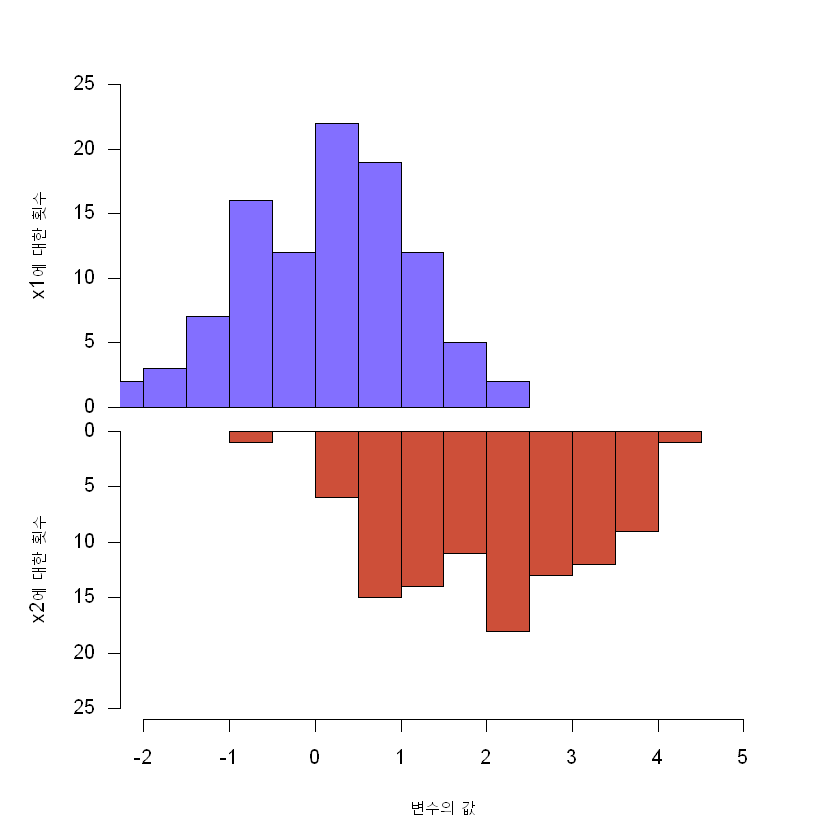

In [7]:
#Create Data
x1 = rnorm(100)
x2 = rnorm(100)+rep(2,100)
par(mfrow=c(2,1))
 
#Make the plot
par(mar=c(0,5,3,3))
hist(x1 , main="" , xlim=c(-2,5), 
          ylab="x1에 대한 횟수", xlab="", 
          ylim=c(0,25) , xaxt="n", las=1 , 
          col="slateblue1", breaks=10)
par(mar=c(5,5,0,3))
hist(x2 , main="" , xlim=c(-2,5), 
          ylab="x2에 대한 횟수", xlab="변수의 값", 
          ylim=c(25,0) , las=1 , 
          col="tomato3"  , breaks=10)

### BoxPlot
 * 하나 또는 여러 개의 숫자 변수에 대한 좋은 요약을 제공
 * 상자를 2 부분으로 나누는 선은 중간 값
 * 데이터의 상자의 끝은 위쪽 및 아래쪽 사 분위수를 표시
 * 극단적 인 선은 특이 치를 제외한 가장 높은 값과 가장 낮은 값을 나타냅니다.
 * 관측치가 많은 경우 jitter를 추가 또는 violinplot을 사용합니다.
 * https://www.r-graph-gallery.com/boxplot/

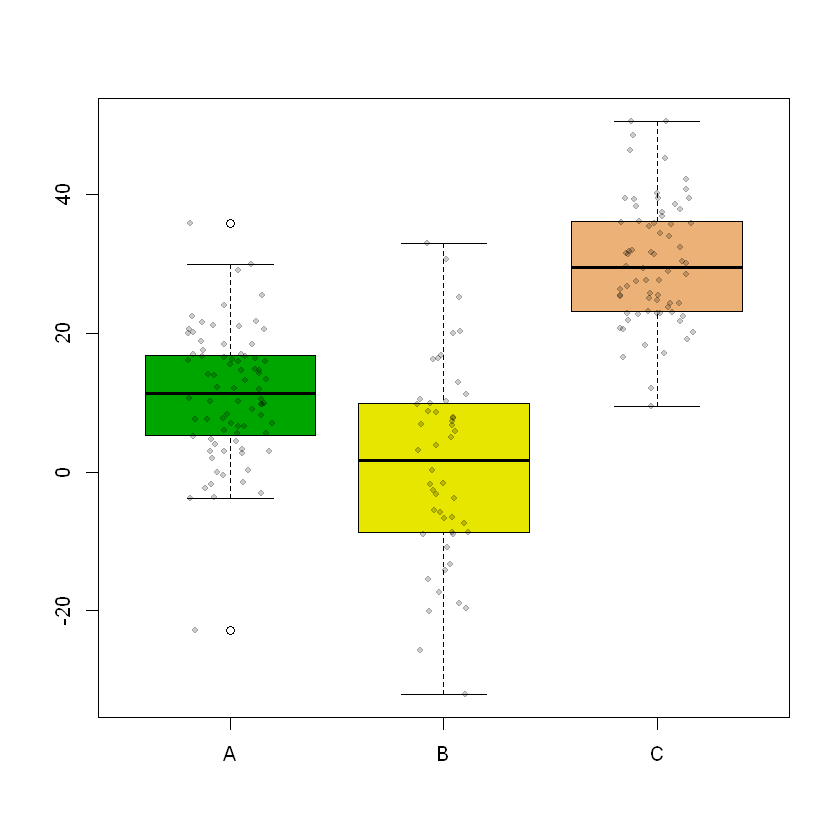

In [25]:
# Create data
names=c(rep("A", 80) , rep("B", 50) , rep("C", 70))
value=c( rnorm(80 , mean=10 , sd=9) , rnorm(50 , mean=2 , sd=15) , rnorm(70 , mean=30 , sd=10) )
data=data.frame(names,value)
 
# Basic boxplot
boxplot(data$value ~ data$names , col=terrain.colors(4) )
 
# Add data points
mylevels<-levels(data$names)
levelProportions<-summary(data$names)/nrow(data)
 
for(i in 1:length(mylevels)){
 
  thislevel<-mylevels[i]
  thisvalues<-data[data$names==thislevel, "value"]
   
  # take the x-axis indices and add a jitter, proportional to the N in each level
  myjitter<-jitter(rep(i, length(thisvalues)), amount=levelProportions[i]/2)
  points(myjitter, thisvalues, pch=20, col=rgb(0,0,0,.2)) 
   
}

### Scatter plot (산점도)
 * Scatterplot은 2 차원의 데이터 세트 2 개 값을 표시
 * 두 변수 사이의 관계를 연구하는 것은 정말 유용합니다. 
 * 색상이나 도형 (그룹 또는 세 번째 변수 표시)을 사용하여 더 많은 정보를 제공하는 것이 일반적
 * 만약 너무 많은 점으로 인해 중복점이 생긴다면, 2D density plot 고려하기
 * 참조 : https://www.r-graph-gallery.com/scatterplot/

## #35 XYPLOT
 * 2 개의 정량 변수 사이의 관계를 시각화
 * 또한 여러 수준의 요인에 대해 이러한 관계를 쉽게 연구

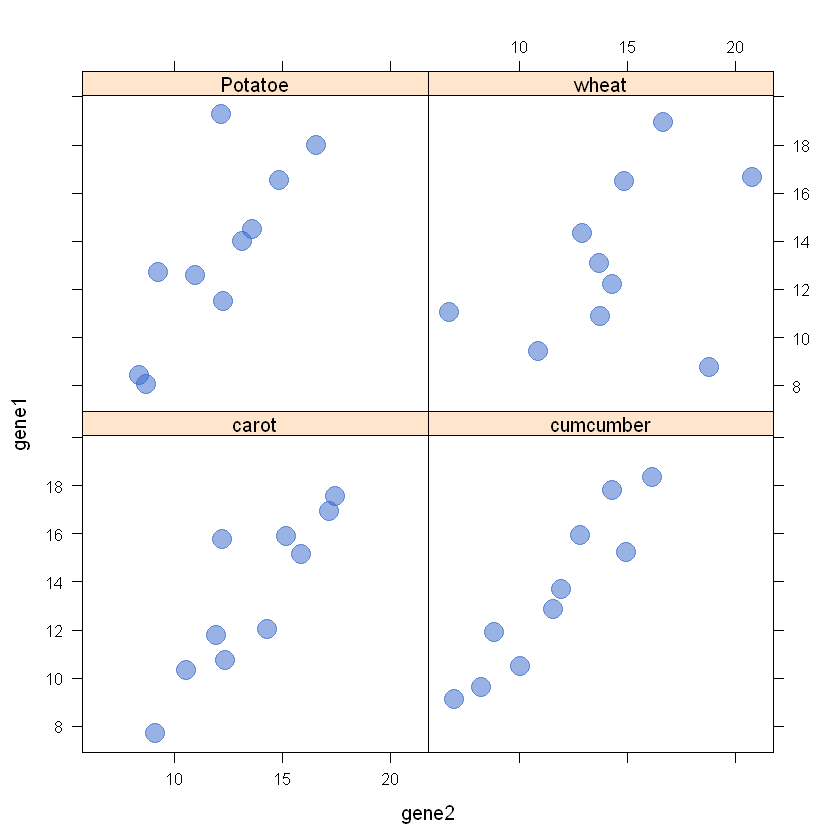

In [31]:
# create data :
sample= paste(rep("sample_",40) , seq(1,40) , sep="")
specie= c(rep("carot" , 10) , 
          rep("cumcumber" , 10) , 
          rep("wheat" , 10) , 
          rep("Potatoe" , 10) )  # 각각 10개씩 있음.

gene1=c( seq(5,14)+rnorm(10 , 4 , 1) , 
        seq(5,14)+rnorm(10 , 4 , 1) , 
        seq(5,14)+rnorm(10 , 4 , 1) , 
        seq(5,14)+rnorm(10 , 4 , 1) )

gene2=c( seq(5,14)+rnorm(10 , 4 , 1) , 
        seq(5,14)+rnorm(10 , 2 , 0.2) , 
        seq(5,14)+rnorm(10 , 4 , 4) , 
        seq(5,14)+rnorm(10 , 4 , 3) )

data=data.frame(sample,specie,gene1,gene2)
 
# Make the graph
library(lattice)
xyplot(gene1 ~ gene2 | specie , 
       data=data , 
       pch=20 , 
       cex=3 , 
       col=rgb(0.2,0.4,0.8,0.5) )

### #5 CORRELATION OF DISCRETE VARIABLES
 * 점들이 겹칠때, 점을 크게 만들어보자.(제안)

In [32]:
# 2개의 이산형 변수
a=c(1,1,3,4,5,5,1,1,2,3,4,1,3,2,1,1,5,1,4,3,2,3,1,0,2)
b=c(1,2,3,5,5,5,2,1,1,3,4,3,3,4,1,1,4,1,4,2,2,3,0,0,1)
 
# 발생할 수 있는 경우의 수와 횟수를 표시
# I count the occurence of each couple of values. Eg : number of time a=1 and b=1, number of time a=1 and b=2 etc...
AA=xyTable(a,b)
AA

$x
 [1] 0 1 1 1 1 2 2 2 3 3 4 4 5 5

$y
 [1] 0 0 1 2 3 1 2 4 2 3 4 5 4 5

$number
 [1] 1 1 5 2 1 2 1 1 1 4 2 1 1 2

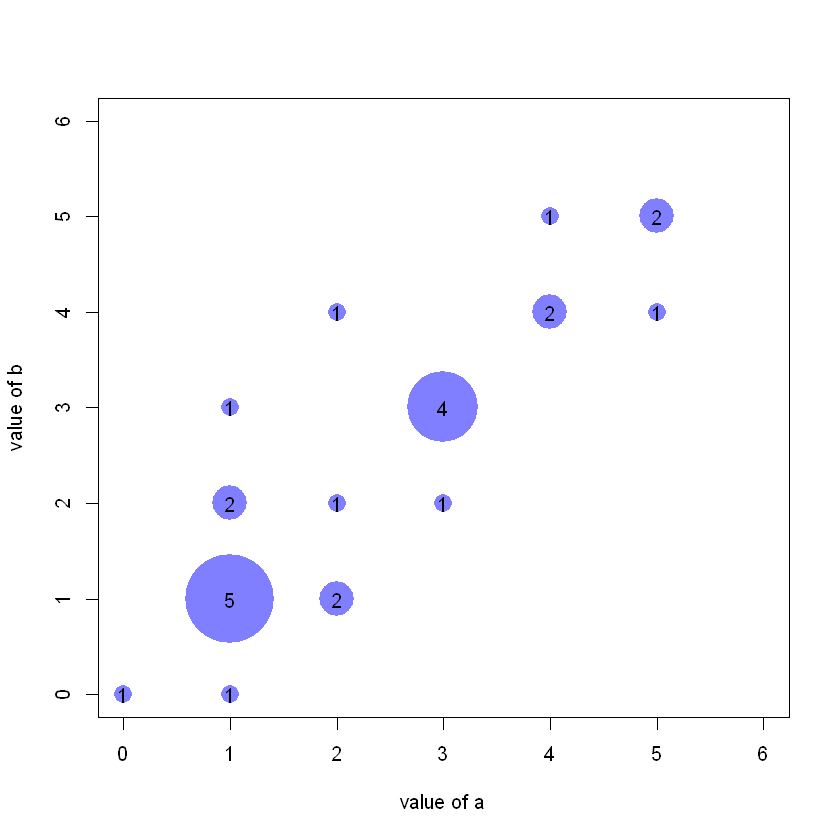

In [33]:
# Now I can plot this ! I represent the dots as big as the couple occurs often
coeff_bigger=2
plot(AA$x , AA$y , cex=AA$number*coeff_bigger  , pch=16 , col=rgb(0,0,1,0.5) , xlab= "value of a" , ylab="value of b" , xlim=c(0,6) , ylim=c(0,6) )
text (AA$x , AA$y , AA$number )
 
#Note : It's easy to make a function that will compute this kind of plot automaticaly :
represent_discrete_variable=function(var1, var2 , coeff_bigger){
  AA=xyTable(var1,var2)
  plot(AA$x , AA$y , 
       cex=AA$number*coeff_bigger  , 
       pch=16 , 
       col="chocolate1" , 
       xlab= "value of a" , ylab="value of b" )
  text (AA$x , AA$y , AA$number )
}

### Barplot

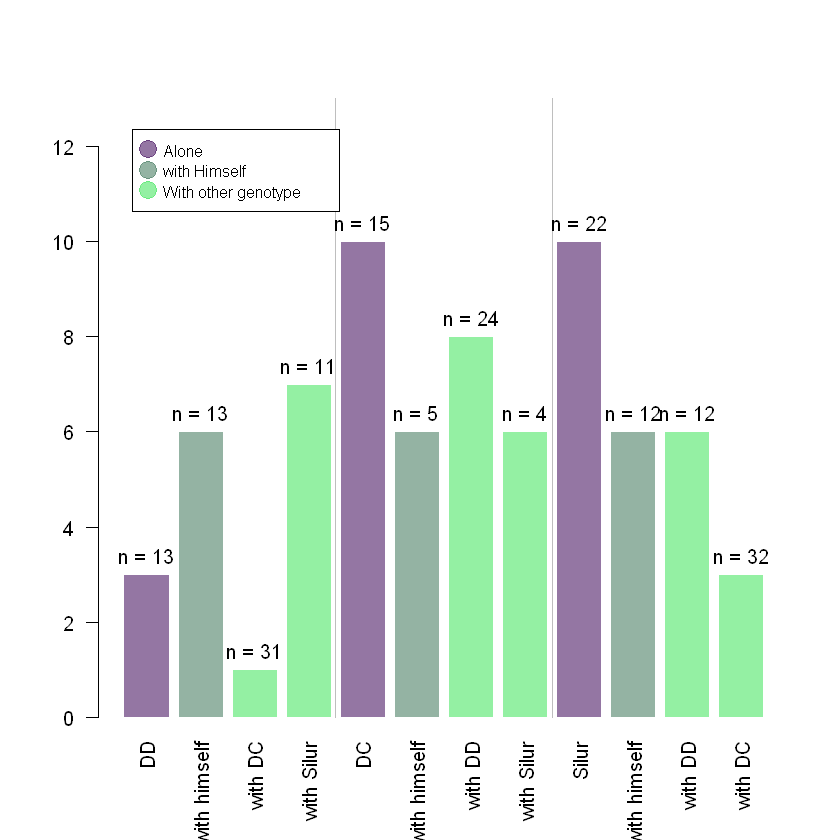

In [40]:
# Data
name= c("DD","with himself","with DC","with Silur" ,"DC","with himself","with DD","with Silur" ,"Silur","with himself","with DD","with DC" )
average= sample(seq(1,10) , 12 , replace=T)
number= sample(seq(4,39) , 12 , replace=T)
data=data.frame(name,average,number)
 
# Basic Barplot
my_bar=barplot(data$average , 
               border=F , 
               names.arg=data$name , 
               las=2 , 
               col=c(rgb(0.3,0.1,0.4,0.6) , 
                     rgb(0.3,0.5,0.4,0.6) , 
                     rgb(0.3,0.9,0.4,0.6) ,  
                     rgb(0.3,0.9,0.4,0.6)) , 
               ylim=c(0,13) , main="" )

abline(v=c(4.9 , 9.7) , col="grey")
 
# Add the text 
text(my_bar, data$average+0.4 , paste("n = ",data$number,sep="") ,cex=1) 
 
#Legende
legend("topleft", legend = c("Alone","with Himself","With other genotype" ) , 
     col = c(rgb(0.3,0.1,0.4,0.6) , 
             rgb(0.3,0.5,0.4,0.6) , 
             rgb(0.3,0.9,0.4,0.6) ,  
             rgb(0.3,0.9,0.4,0.6)) , 
            bty = "y", 
            pch=20 ,       # 범례의 표시 점
            pt.cex = 3,    # 범례의 점의 크기 
            cex = 0.8, 
            horiz = FALSE, 
            inset = c(0.05, 0.05))
 

### Treemap
 * 트리 맵은 계층 데이터를 중첩 된 사각형 세트로 표시
 * 트리의 각 가지에는 사각형이 주어지며 하위 분기를 나타내는 작은 사각형으로 바둑판 식으로 배열
 * Treemap은 Treemap 라이브러리를 사용하여 쉽게 수행
 * 참조 : https://www.r-graph-gallery.com/treemap/

In [43]:
# install.packages("treemap")
# library
library(treemap)

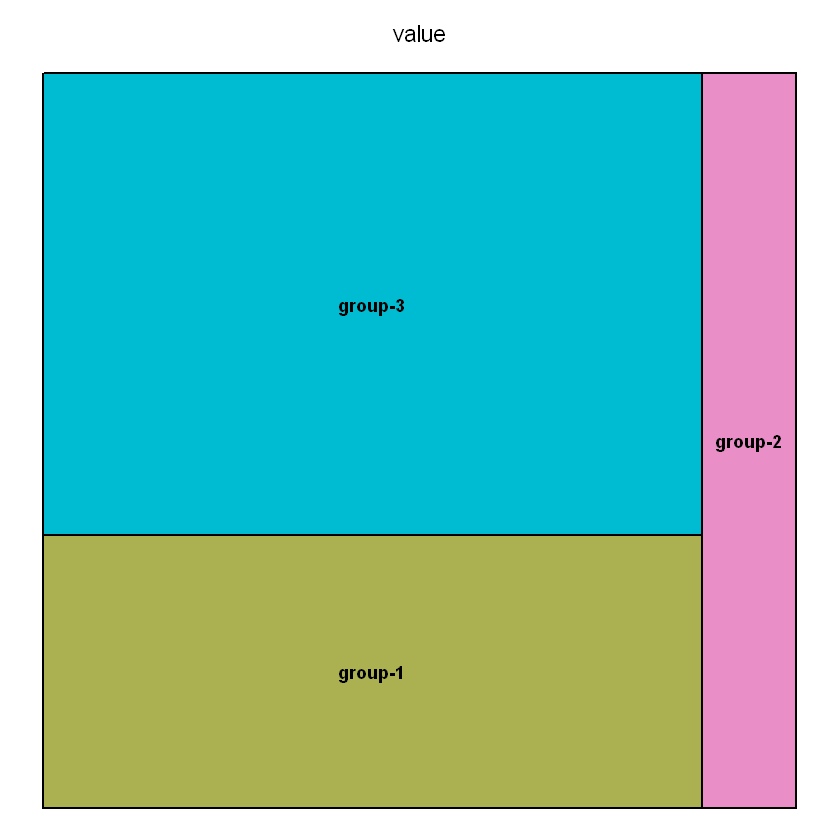

In [44]:
# Create data
group=c("group-1","group-2","group-3")
value=c(13,5,22)
data=data.frame(group,value)
 
# treemap
treemap(data,
            index="group",
            vSize="value",
            type="index"
            )

### CORRELOGRAM
 * 행렬의 숫자 변수 쌍 사이의 관계를 분석
 * 상관 (거품, 선, 숫자 ..)을 나타냅니다. 대각선은 막대 그래프 또는 밀도 플롯을 사용하여 각 변수의 분포

### #97 CORRELATION ELLIPSES

In [47]:
# install.packages("ellipse")
# install.packages("RColorBrewer")
# Libraries
library(ellipse)
library(RColorBrewer)

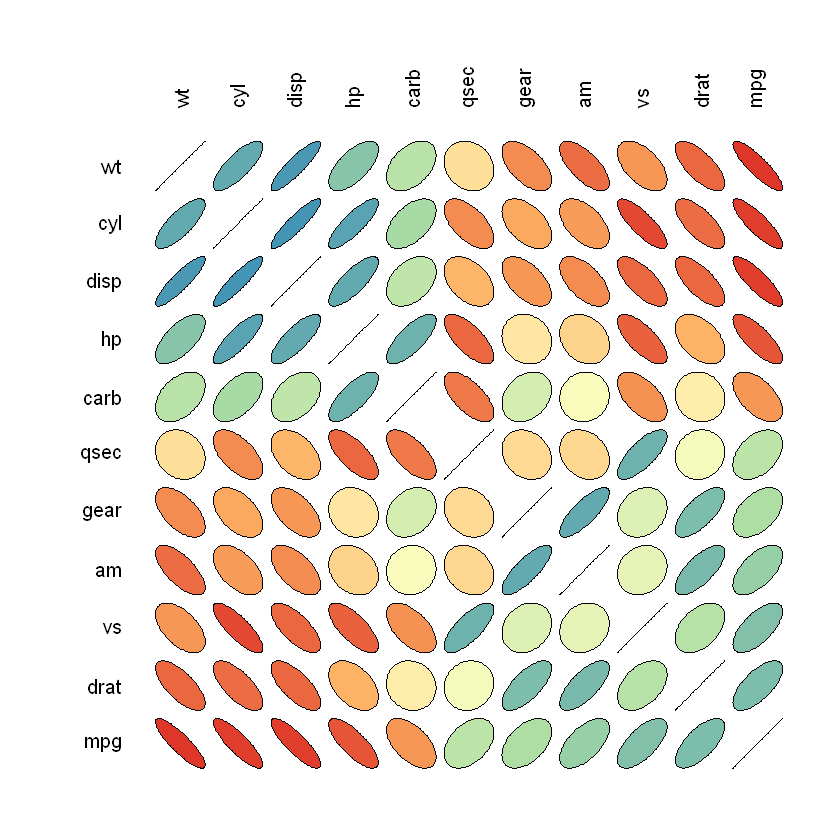

In [48]:
# Use of the mtcars data proposed by R
data=cor(mtcars)
 
# Build a Pannel of 100 colors with Rcolor Brewer
my_colors <- brewer.pal(5, "Spectral")
my_colors=colorRampPalette(my_colors)(100)
 
# Order the correlation matrix
ord <- order(data[1, ])
data_ord = data[ord, ord]
plotcorr(data_ord , col=my_colors[data_ord*50+50] , mar=c(1,1,1,1)  )

### #99 SCATTERPLOT MATRIX – CAR PACKAGE
 * 산점도 행렬은 여러 변수 사이에 선형 상관 관계가 있는지 대략적으로 판단 할 수있는 좋은 방법


Attaching package: 'car'

The following object is masked from 'package:ellipse':

    ellipse



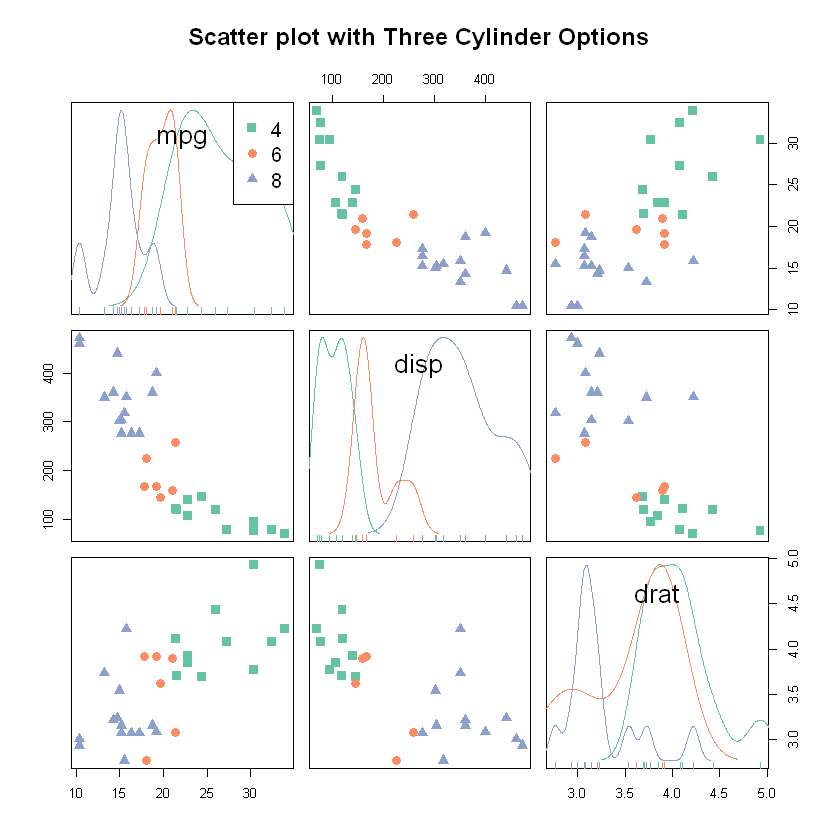

In [49]:
# Packages
library(car)
library(RColorBrewer)
 
# Let's use the car dataset proposed by R
data=mtcars
 
# Make the plot
my_colors <- brewer.pal(nlevels(as.factor(data$cyl)), "Set2")
scatterplotMatrix(~mpg+disp+drat|cyl, data=data , 
                  reg.line="" , 
                  smoother="", 
                  col=my_colors , 
                  smoother.args=list(col="grey") , 
                  cex=1.5 , 
                  pch=c(15,16,17) , 
                  main="Scatter plot with Three Cylinder Options")